<a href="https://colab.research.google.com/github/jhlopesalves/Datacamp-Notebooks/blob/main/Python/Intro%20to%20Seaborn/introduction_to_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
# Create a data directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

# Download files using raw GitHub URLs and save them to the data folder
!wget -P data/ "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Seaborn/data/young-people-survey-responses.csv"
!wget -P data/ "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Seaborn/data/mpg.csv"
!wget -P data/ "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Seaborn/data/student-alcohol-consumption.csv"

# Fetch the zipped archive from UCI - student_data
!wget -P data/ "https://archive.ics.uci.edu/static/public/320/student%2Bperformance.zip"
# Fetch the zipped archive from Pandas Repository - air_df_mean

!wget -P data/ "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2_long.csv"

# Unzip the first archive into the data folder
!unzip -o data/student+performance.zip -d data/

# Unzip the student.zip archive into the data folder
!unzip -o data/student.zip -d data/

# Remove the zip files to save space
!rm data/student+performance.zip
!rm data/student.zip

--2025-05-28 15:37:13--  https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Seaborn/data/young-people-survey-responses.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82829 (81K) [text/plain]
Saving to: ‘data/young-people-survey-responses.csv.7’

young-people-survey 100%[===================>]  80.89K  --.-KB/s    in 0.01s   

2025-05-28 15:37:13 (8.21 MB/s) - ‘data/young-people-survey-responses.csv.7’ saved [82829/82829]

--2025-05-28 15:37:13--  https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Seaborn/data/mpg.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com

### Seaborn built-in dataset `tips`

- total_bill: The total bill amount in dollars.
- tip: The tip amount in dollars.
- sex: The gender of the person who paid the bill (Male or Female).
- smoker: Whether the party included smokers (Yes or No).
- day: The day of the week (Sun, Sat, Thur, Fri).
- time: The time of the day (Dinner or Lunch).
- size: The number of people in the party.

In [3]:
# Load the built-in Seaborn 'tips' dataset
tips = sns.load_dataset("tips")
# Display the first 5 rows to examine the data structure
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


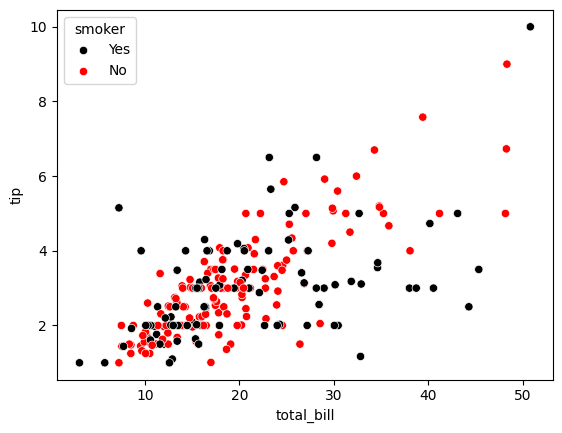

In [4]:
# Define a dictionary to map hue values ("smoker") to specific colors
hue_colors = {"Yes": "black",
"No": "red"}

# scatterplot(): Creates scatter plots for visualizing relationships between two continuous variables
# hue parameter: Colors points based on a categorical variable (smoker status)
# palette parameter: Custom color mapping using a dictionary for precise color control
sns.scatterplot(x="total_bill",
                y="tip",
                data=tips,       # Use the 'tips' DataFrame as the data source
                hue="smoker",    # Color the points based on the 'smoker' column
                palette=hue_colors) # Use the defined 'hue_colors' dictionary for coloring

plt.show()

### Using HTML hex color codes with hue


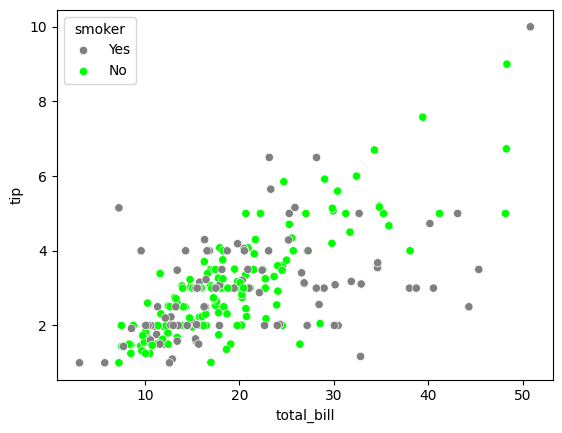

In [5]:
# Define a dictionary to map hue values ("smoker") to specific HTML hex color codes
hue_colors = {"Yes": "#808080", # Grey color for "Yes"
"No": "#00FF00"} # Green color for "No"

# palette with hex colors: Using HTML hex color codes (#RRGGBB) for precise color specification
# Custom color mapping: More professional color control compared to basic color names
sns.scatterplot(x="total_bill",
                y="tip",
                data=tips,
                hue="smoker",    # Color the points based on the 'smoker' column
                palette=hue_colors) # Use the defined 'hue_colors' dictionary for coloring

plt.show()

In [6]:
# Load each subject file (semicolon-separated) into DataFrames
mat = pd.read_csv('data/student-mat.csv', sep=';')
por = pd.read_csv('data/student-por.csv', sep=';')

# Concatenate along rows to get 1 044 records
df = pd.concat([mat, por], ignore_index=True)

# Drop job-related and guardian columns to match DataCamp’s 29 columns
df.drop(columns=['Mjob', 'Fjob', 'reason', 'guardian'], inplace=True)

# Rename and recode 'address' → 'location'
df.rename(columns={'address': 'location'}, inplace=True)
df['location'] = df['location'].map({'U': 'Urban', 'R': 'Rural'})

# Rename and recode 'studytime' → 'study_time' with textual bands
study_map = {
    1: '<2 hours',
    2: '2 to 5 hours',
    3: '5 to 10 hours',
    4: '>10 hours'
}
df.rename(columns={'studytime': 'study_time'}, inplace=True)
df['study_time'] = df['study_time'].map(study_map)

# Reorder columns to match DataCamp’s .head() layout
desired_order = [
    'school','sex','age','famsize','Pstatus','Medu','Fedu','traveltime',
    'failures','schoolsup','famsup','paid','activities','nursery','higher',
    'internet','romantic','famrel','freetime','goout','Dalc','Walc','health',
    'absences','G1','G2','G3','location','study_time'
]
student_data = df[desired_order]

In [7]:
student_data.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,GP,F,18,GT3,A,4,4,2,0,yes,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,GP,F,17,GT3,T,1,1,1,0,no,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,GP,F,15,LE3,T,1,1,1,3,yes,...,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,GP,F,15,GT3,T,4,2,1,0,no,...,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,GP,F,16,GT3,T,3,3,1,0,no,...,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


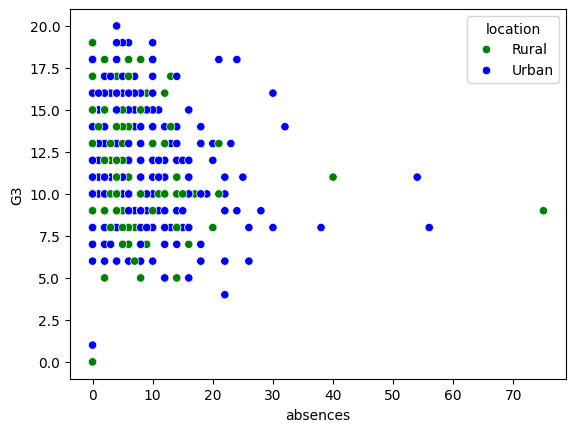

In [8]:
# Create a dictionary mapping subgroup values to colors
palette_colors = {"Rural": "green", "Urban": "blue"}
# Create a scatter plot of absences vs. final grade
# hue_order parameter: Controls the order in which hue categories appear in the legend
# Custom palette: Mapping specific colors to categorical values for consistent visualization
sns.scatterplot(x="absences",
                y="G3",
                data=student_data,
                hue="location",
                hue_order=["Rural", "Urban"],  # Specify order of categories in legend
                palette=palette_colors)

plt.show()

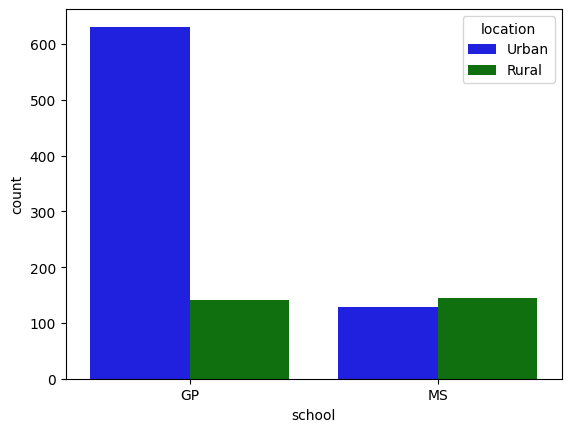

In [9]:
# Create a dictionary mapping subgroup values to colors
palette_colors = {"Rural": "green", "Urban": "blue"}

# Create a count plot of school with location subgroups
# countplot(): Automatically counts occurrences of categorical variables
# hue parameter in countplot: Creates grouped bar charts with subcategories
# Consistent palette: Using same color scheme across multiple plots for coherent analysis
sns.countplot(x="school", data=student_data, hue="location", palette=palette_colors)

plt.show()

## Visualizing Two Quantitative Variables

In this chapter, you will create and customize plots that visualize the relationship between two quantitative variables. To do this, you will use scatter plots and line plots to explore how the level of air pollution in a city changes over the course of a day and how horsepower relates to fuel efficiency in cars. You will also see another big advantage of using Seaborn - the ability to easily create subplots in a single figure!

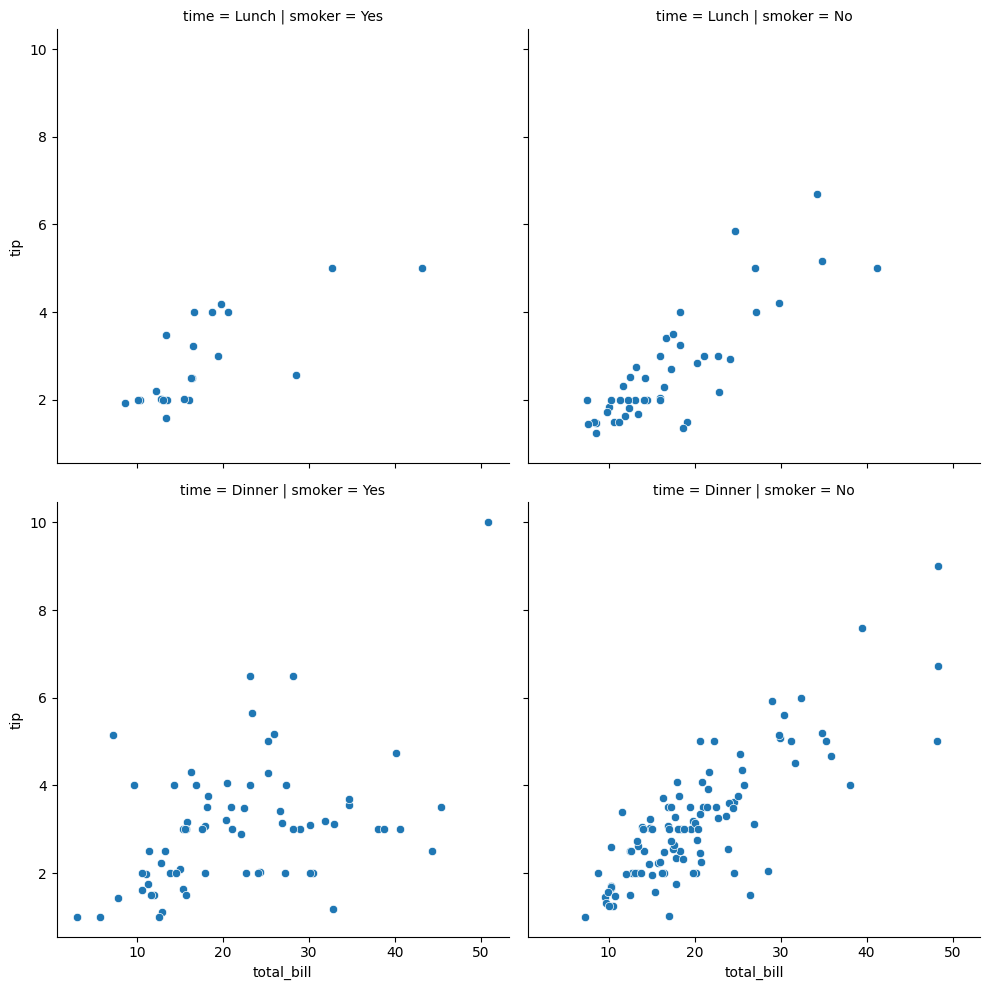

In [10]:
# Create a scatter plot using relplot
# relplot(): High-level interface for relational plots (scatter and line)
# col parameter: Creates separate subplot columns for each category
# row parameter: Creates separate subplot rows for each category
# Subplot grid: Automatically creates a 2x2 grid based on smoker (Yes/No) and time (Dinner/Lunch)
sns.relplot(x="total_bill", # Map total_bill to the x-axis
            y="tip",        # Map tip to the y-axis
            data=tips,      # Use the 'tips' DataFrame
            kind="scatter", # Create a scatter plot
            col="smoker",   # Create columns for each smoker category (Yes/No)
            row="time")     # Create rows for each time category (Dinner/Lunch)

plt.show()

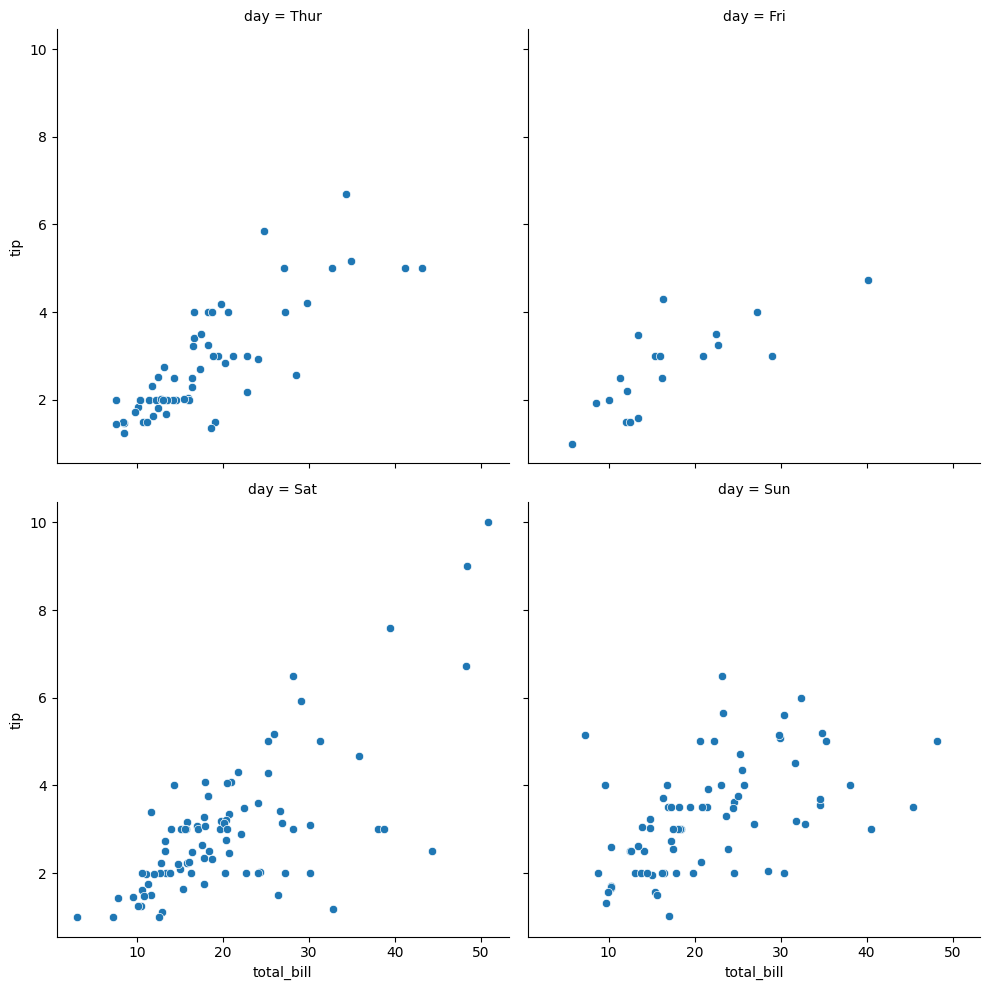

In [11]:
# col_wrap parameter: Wraps subplot columns after specified number (creates 2x2 grid instead of 1x4)
# col_order parameter: Controls the sequence in which categories appear in subplots
# Flexible subplot layout: Better space utilization for multiple categories
sns.relplot(x="total_bill",
            y="tip",
            data=tips,
            kind="scatter",
            col="day", # Create columns for each day of the week
            col_wrap=2, # Wrap the columns after 2 plots
            col_order=["Thur", # Specify the order of the columns
                       "Fri",
                       "Sat",
                       "Sun"])

plt.show()

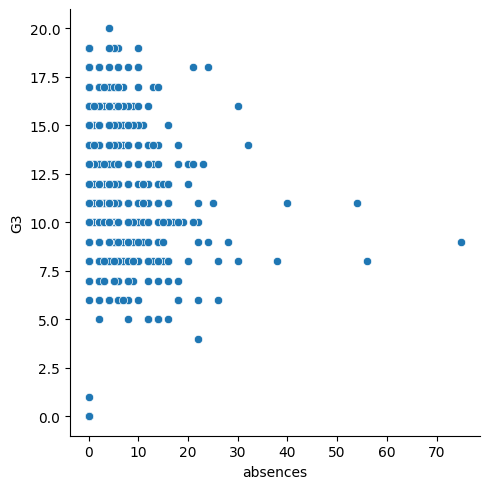

In [12]:
# relplot() vs scatterplot(): relplot provides more flexibility for creating subplots
# Consistent API: Same parameters work across different plot types
# Change to use relplot() instead of scatterplot()
sns.relplot(x="absences", y="G3", kind="scatter", data=student_data)

plt.show()

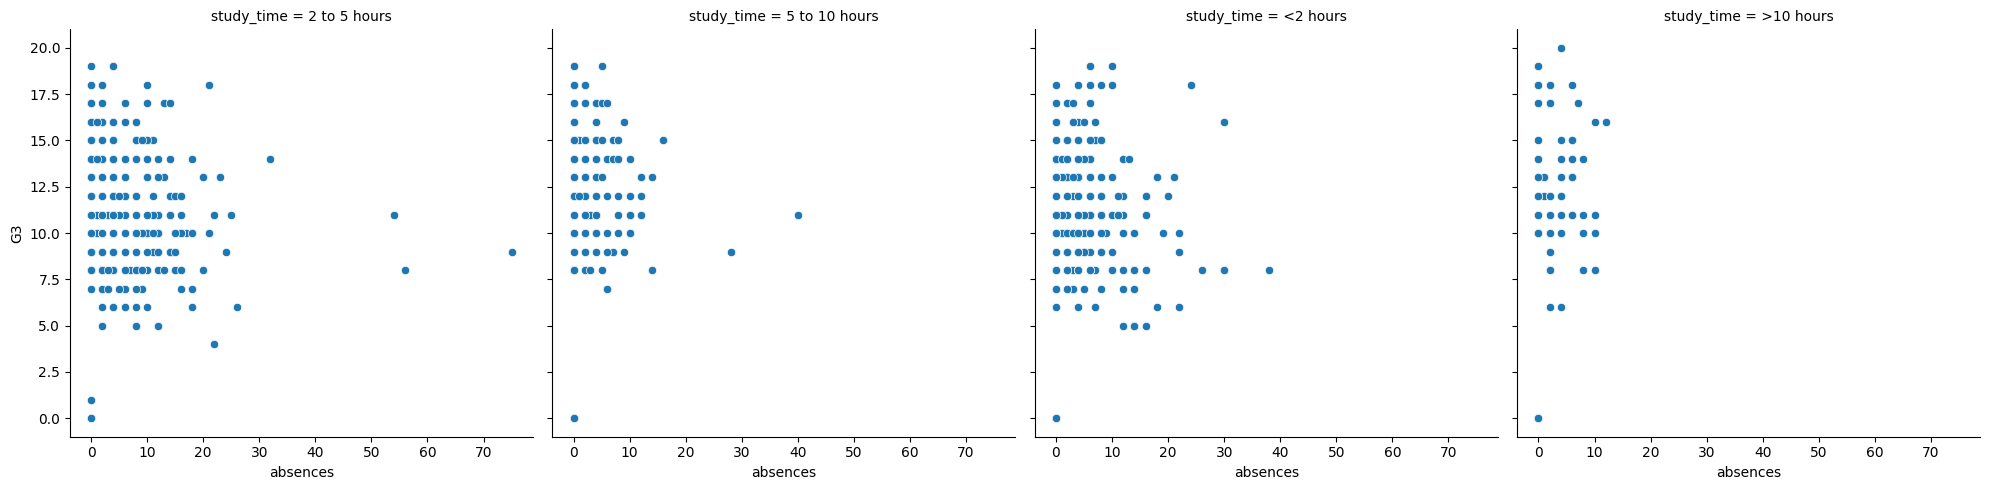

In [13]:
# col parameter: Creates separate plots for each study time category
# Automatic subplot arrangement: Seaborn handles layout and spacing automatically
# Comparative analysis: Easy to compare patterns across different groups
sns.relplot(x="absences", y="G3",
            data=student_data,
            kind="scatter",
            col="study_time")  # Creates 4 subplots for different study time categories

plt.show()

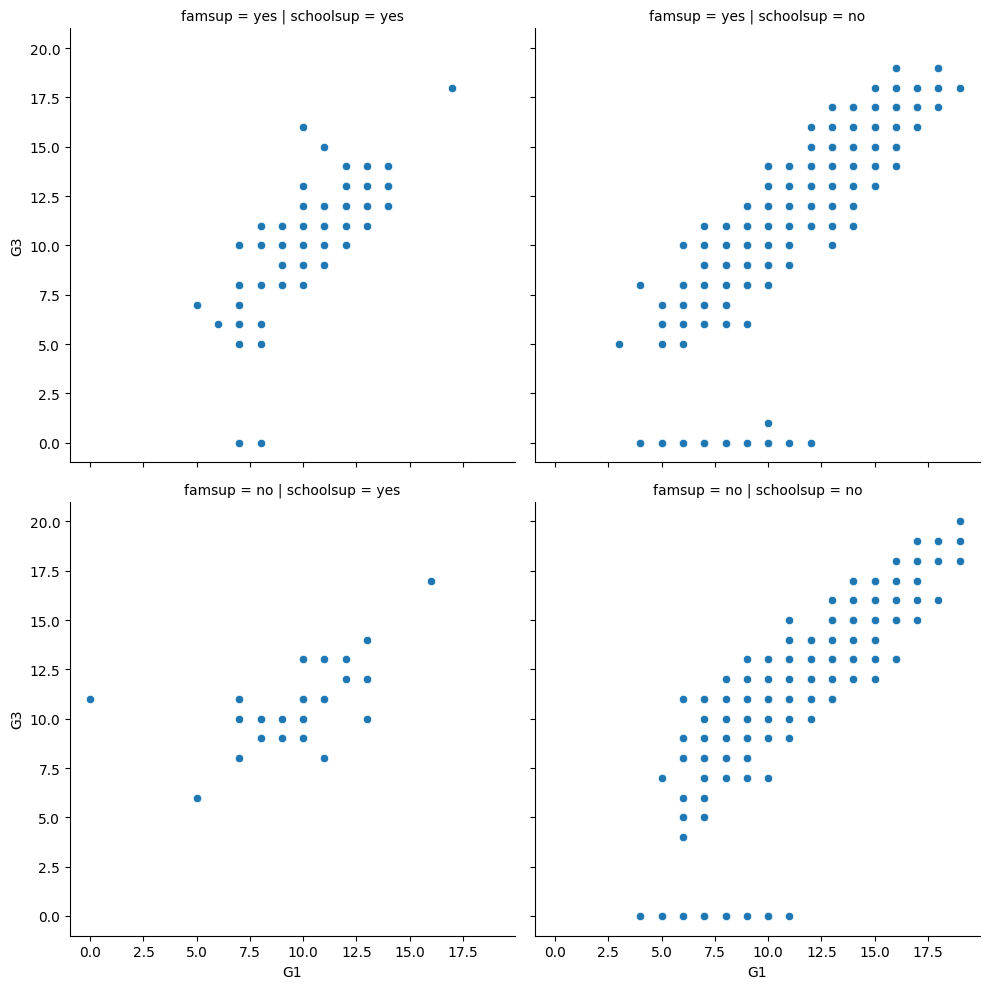

In [14]:
# Combined col and row parameters: Creates a 2x2 grid (2 school support × 2 family support)
# col_order and row_order: Controls the arrangement of categories in the grid
# Multi-dimensional analysis: Examines relationships across two categorical variables simultaneously
sns.relplot(x="G1", y="G3",
            data=student_data,
            kind="scatter",
            col="schoolsup",           # Columns for school support (yes/no)
            col_order=["yes", "no"],
            row="famsup",              # Rows for family support (yes/no)
            row_order=["yes", "no"])
plt.show()

## Custmizing Scatter Plots

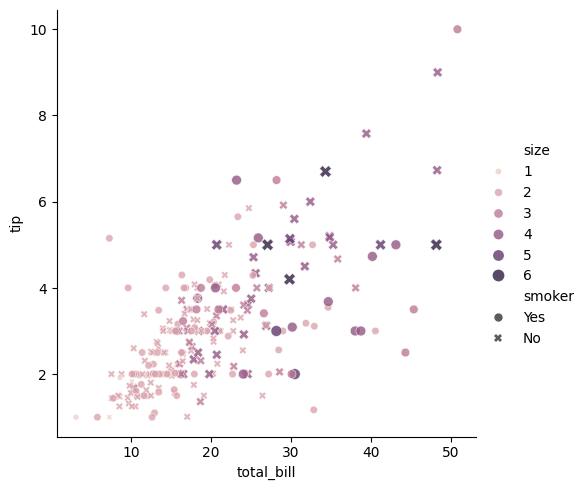

In [15]:
# size parameter: Maps point size to a numeric variable (party size)
# hue parameter: Maps color to the same variable for redundant encoding
# style parameter: Maps point markers to a categorical variable (smoker status)
# alpha parameter: Controls transparency for better visualization of overlapping points
# Multiple aesthetics: Encoding multiple variables simultaneously in one plot
sns.relplot(x="total_bill",
            y="tip",
            data=tips,
            kind="scatter",
            size="size",      # Point size varies with party size
            hue="size",       # Color also varies with party size
            style="smoker",   # Point shape varies with smoker status
            alpha=0.8)        # Slight transparency

plt.show()

### Changing the size of scatter plot points
In this exercise, we'll explore Seaborn's mpg dataset, which contains one row per car model and includes information such as the year the car was made, the number of miles per gallon ("M.P.G.") it achieves, the power of its engine (measured in "horsepower"), and its country of origin.

What is the relationship between the power of a car's engine ("horsepower") and its fuel efficiency ("mpg")? And how does this relationship vary by the number of cylinders ("cylinders") the car has? Let's find out.

Let's continue to use relplot() instead of scatterplot() since it offers more flexibility.

In [16]:
# Load the MPG (Miles Per Gallon) dataset from CSV file
# This dataset contains car performance metrics including fuel efficiency and engine specifications
mpg = pd.read_csv("data/mpg.csv")

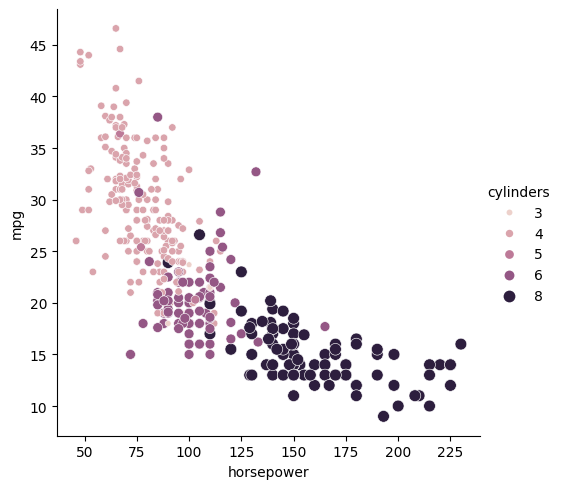

In [17]:
# Dual encoding: Using both size and color helps distinguish categories clearly
# Numeric to visual mapping: Automatic scaling of point sizes based on data values
# Create scatter plot of horsepower vs. mpg
sns.relplot(x="horsepower", y="mpg",
            data=mpg, kind="scatter",
            size="cylinders",  # Point size varies with cylinder count
            hue="cylinders")   # Color varies with cylinder count

plt.show()

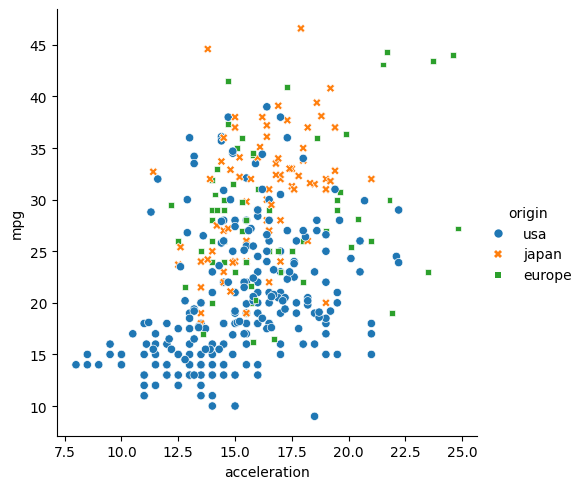

In [18]:
# style parameter: Uses different marker shapes for each country
# Categorical encoding: Both color and shape help distinguish between categories
# Accessibility: Multiple visual cues make plots readable even in grayscale
# Create a scatter plot of acceleration vs. mpg
sns.relplot(x="acceleration",
            y="mpg",
            kind="scatter",
            hue="origin",     # Color by country of origin
            style="origin",   # Different markers for each country
            data=mpg)

plt.show()

In [19]:
# Load the air quality dataset containing NO2 pollution measurements
# This dataset includes air pollution data from different cities and time periods
air_quality = pd.read_csv("data/air_quality_no2_long.csv")

In [20]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [21]:
# Convert 'date.utc' to datetime objects and extract the hour
air_quality['date.utc'] = pd.to_datetime(air_quality['date.utc'])
air_quality['hour'] = air_quality['date.utc'].dt.hour

# Group by hour and location and calculate the mean of 'value' (assuming 'value' is the NO_2 measurement)
air_df_mean = air_quality.groupby(['hour','location',"country"])['value'].mean().reset_index(name='NO_2_mean')

In [22]:
air_df_mean.head()

,hour,location,country,NO_2_mean
0,0,BETR801,BE,24.750000
1,0,FR04014,FR,31.683333
2,0,London Westminster,GB,24.292683
3,1,BETR801,BE,25.838235
4,1,FR04014,FR,27.433333


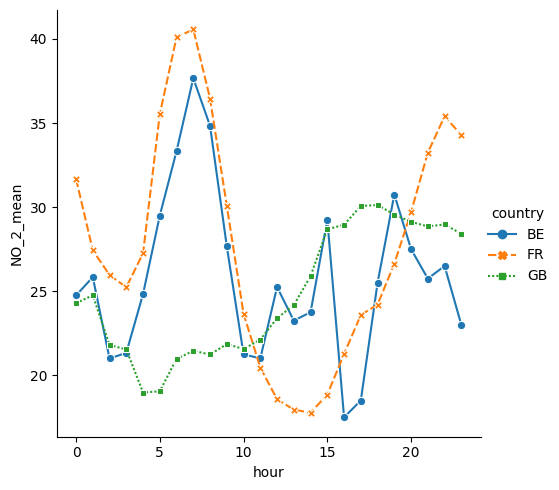

In [23]:
# kind="line": Creates line plots instead of scatter plots using relplot
# style parameter: Different line styles (solid, dashed, etc.) for each country
# hue parameter: Different colors for each country
# markers=True: Adds point markers to line plots for better visibility
# Time series visualization: Line plots are ideal for showing trends over time
sns.relplot(x="hour",
            y="NO_2_mean",
            data=air_df_mean,
            kind="line",      # Line plot for time series data
            style="country",  # Different line styles per country
            hue="country",    # Different colors per country
            markers=True)     # Add markers to lines
plt.show()

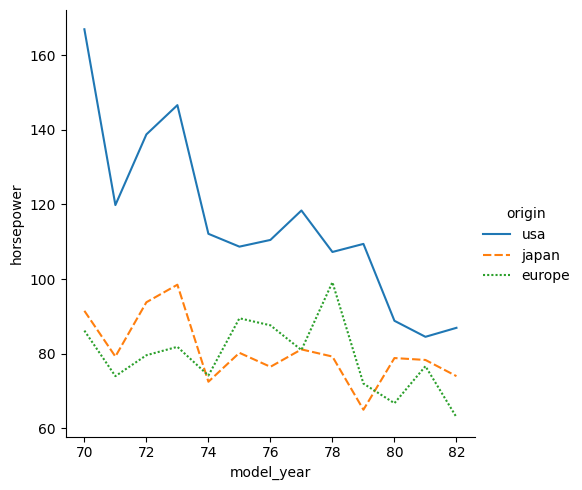

In [24]:
# Change to create subgroups for country of origin
sns.relplot(x="model_year", y="horsepower",
            data=mpg, kind="line",
            errorbar=None,
            style="origin",
            hue="origin")
plt.show()

## Visualizing a Categorical and a Quantitative Variable

Categorical variables are present in nearly every dataset, but they are especially prominent in survey data. In this chapter, you will learn how to create and customize categorical plots such as box plots, bar plots, count plots, and point plots. Along the way, you will explore survey data from young people about their interests, students about their study habits, and adult men about their feelings about masculinity.

In [25]:
survey_data = pd.read_csv("data/young-people-survey-responses.csv")

In [26]:
survey_data.head()

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village


In [27]:
# Separate this plot into two side-by-side column subplots based on "Age Category", which separates respondents into those that are younger than 21 vs. 21 and older.
survey_data["Age Category"] = survey_data["Age"].apply(lambda x: "Under 21" if x < 21 else "21 and Older")
display(survey_data.head())

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town,Age Category
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village,Under 21
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city,Under 21
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city,Under 21
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city,21 and Older
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village,Under 21


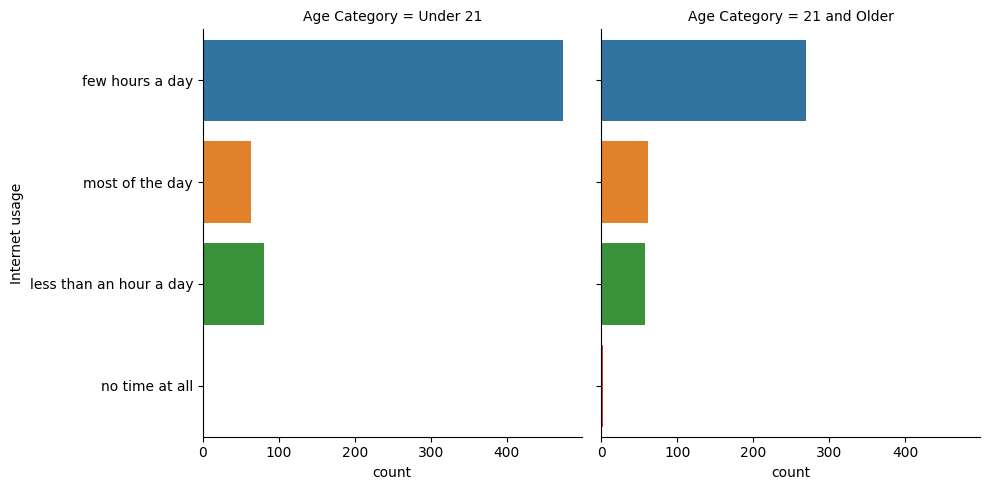

In [28]:
# Separate into column subplots based on age category
sns.catplot(y="Internet usage", data=survey_data,
            kind="count",
            col="Age Category",
            hue="Internet usage") # Add hue to color bars by Internet usage category

# Show plot
plt.show()

### Bar plots with percentages

Let's continue exploring the responses to a survey sent out to young people. The variable "Interested in Math" is True if the person reported being interested or very interested in mathematics, and False otherwise. What percentage of young people report being interested in math, and does this vary based on gender? Let's use a bar plot to find out.

As a reminder, we'll create a bar plot using the catplot() function, providing the name of categorical variable to put on the x-axis (x=____), the name of the quantitative variable to summarize on the y-axis (y=____), the pandas DataFrame to use (data=____), and the type of categorical plot (kind="bar").

In [29]:
# Create the "Interested in math" column
# Define "Interested in math" as a rating of 4 or 5 in the 'Mathematics' column
survey_data['Interested in math'] = survey_data['Mathematics'].apply(lambda x: x in [4, 5])

# Display the head of the DataFrame with the new column
display(survey_data.head())

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town,Age Category,Interested in math
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village,Under 21,False
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city,Under 21,True
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city,Under 21,True
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city,21 and Older,True
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village,Under 21,False


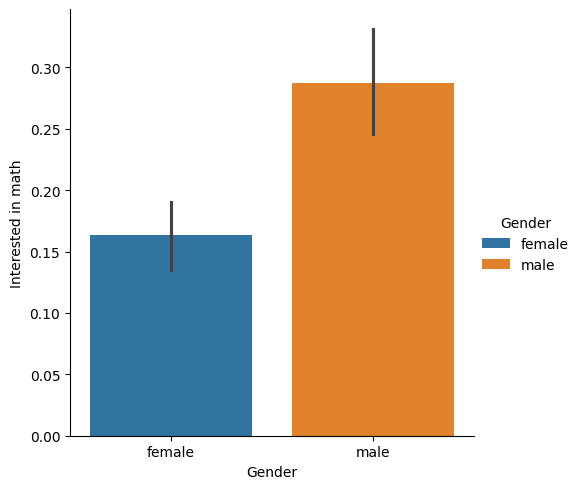

In [30]:
sns.catplot(x="Gender",
            y="Interested in math",
            data=survey_data,
            kind="bar",
            hue="Gender") # Add hue to color bars by Gender
plt.show()

### Customizing bar plots

In this exercise, we'll explore data from students in secondary school. The "study_time" variable records each student's reported weekly study time as one of the following categories: "<2 hours", "2 to 5 hours", "5 to 10 hours", or ">10 hours". Do students who report higher amounts of studying tend to get better final grades? Let's compare the average final grade among students in each category using a bar plot.

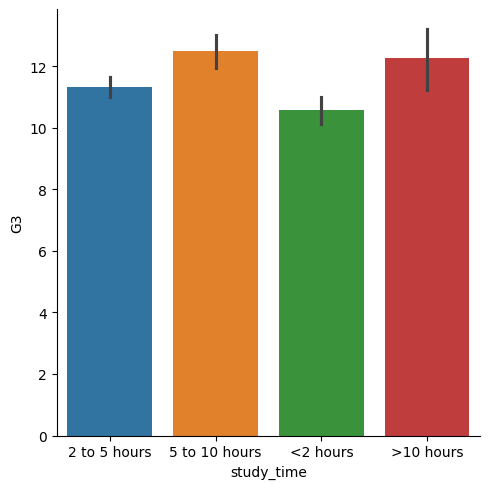

In [31]:
# Create bar plot of average final grade in each study category
sns.catplot(x="study_time",
            y="G3", kind="bar",
            data=student_data,
            hue="study_time")

# Show plot
plt.show()

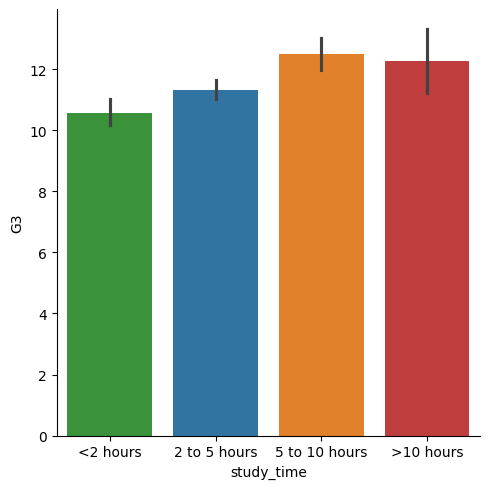

In [32]:
# List of categories from lowest to highest
category_order = ["<2 hours",
                  "2 to 5 hours",
                  "5 to 10 hours",
                  ">10 hours"]

# Rearrange the categories
sns.catplot(x="study_time", y="G3", order=category_order,
data=student_data, kind="bar", hue="study_time")

# Show plot
plt.show()

### Create and interpret a box plot

Let's continue using the student_data dataset. In an earlier exercise, we explored the relationship between studying and final grade by using a bar plot to compare the average final grade (`"G3"`) among students in different categories of `"study_time"`.

In this exercise, we'll try using a box plot look at this relationship instead. As a reminder, to create a box plot you'll need to use the `catplot()` function and specify the name of the categorical variable to put on the x-axis (`x=____`), the name of the quantitative variable to summarize on the y-axis (`y=____`), the pandas DataFrame to use (`data=____`), and the type of plot (`kind="box"`).

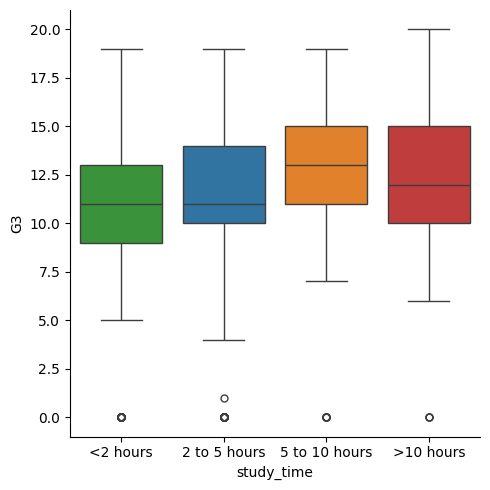

In [33]:
# Specify the category ordering
study_time_order = ["<2 hours", "2 to 5 hours",
                    "5 to 10 hours", ">10 hours"]

# Create a box plot and set the order of the categories
sns.catplot(x="study_time",
            y="G3",
            data=student_data,
            kind="box",
            order=study_time_order,
            hue="study_time")

# Show plot
plt.show()

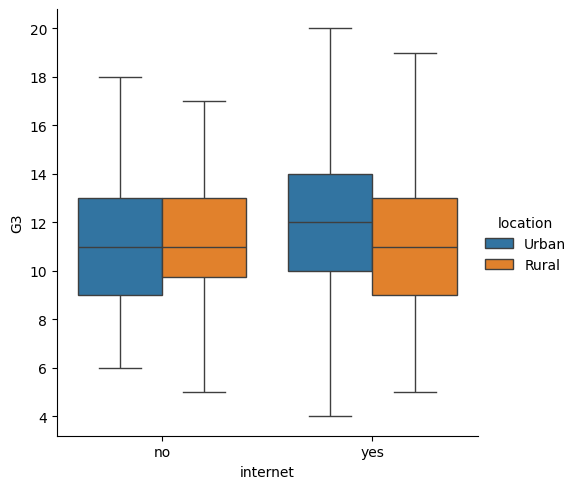

In [34]:
# Create a box plot with subgroups and omit the outliers
sns.catplot(x="internet",
            y="G3",
            data=student_data,
            kind="box",
            showfliers=False,
            hue="location")

# Show plot
plt.show()

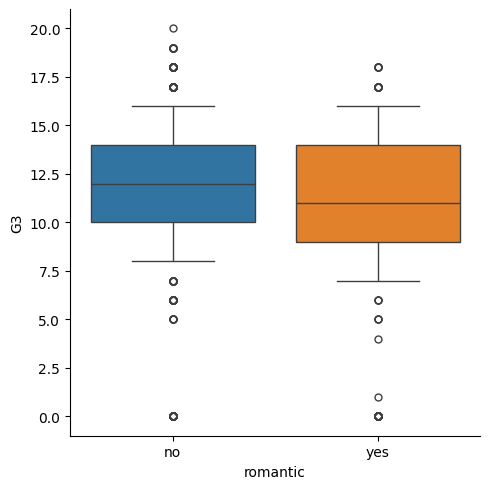

In [35]:
# Set the whiskers to 0.5 * IQR

sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            hue="romantic",
            whis=0.5)

# Show plot
plt.show()

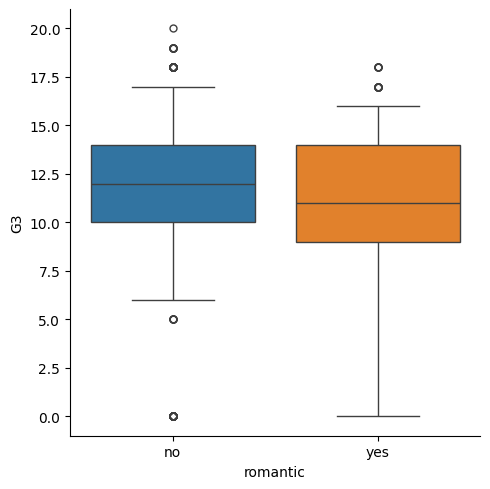

In [36]:
# Extend the whiskers to the 5th and 95th percentile
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            hue="romantic",
            whis=[5, 95])

# Show plot
plt.show()

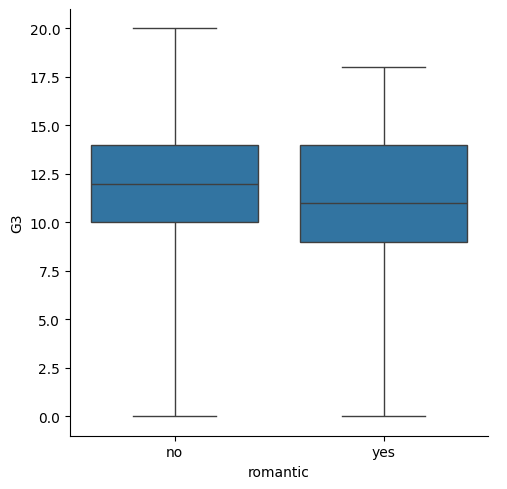

In [37]:
# Set the whiskers at the min and max values
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            whis=[0, 100])

# Show plot
plt.show()

### Customizing point plots
Let's continue to look at data from students in secondary school, this time using a point plot to answer the question: does the quality of the student's family relationship influence the number of absences the student has in school? Here, we'll use the `"famrel"` variable, which describes the quality of a student's family relationship from 1 (very bad) to 5 (very good).

As a reminder, to create a point plot, use the `catplot()` function and specify the name of the categorical variable to put on the x-axis (`x=____`), the name of the quantitative variable to summarize on the y-axis (`y=____`), the pandas DataFrame to use (`data=____`), and the type of categorical plot (`kind="point"`).

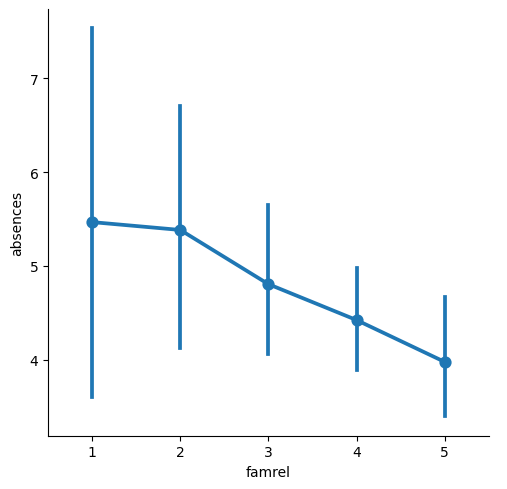

In [38]:
# Create a point plot of family relationship vs. absences
sns.catplot(x="famrel",
            y="absences",
            data=student_data,
            kind="point")

# Show plot
plt.show()

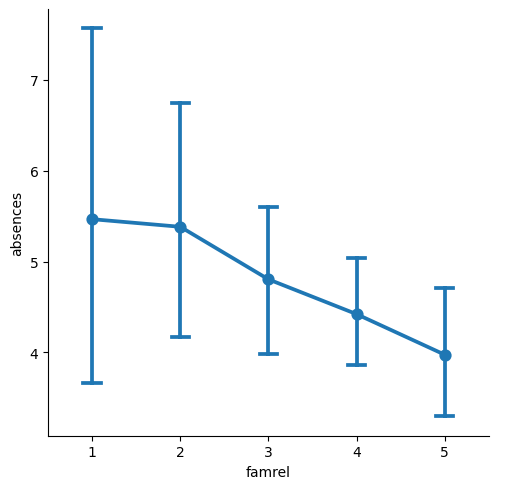

In [39]:
# Add caps to the confidence interval
sns.catplot(x="famrel", y="absences",
            data=student_data,
            kind="point",
            capsize=0.2)


# Show plot
plt.show()

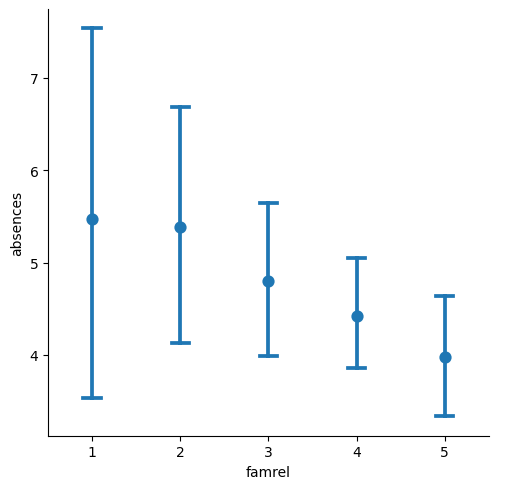

In [40]:
# Remove the lines joining the points
sns.catplot(x="famrel", y="absences",
			data=student_data,
            kind="point",
            capsize=0.2,
            linestyle="none")

# Show plot
plt.show()

Let's continue exploring the dataset of students in secondary school. This time, we'll ask the question: is being in a romantic relationship associated with higher or lower school attendance? And does this association differ by which school the students attend? Let's find out using a point plot.

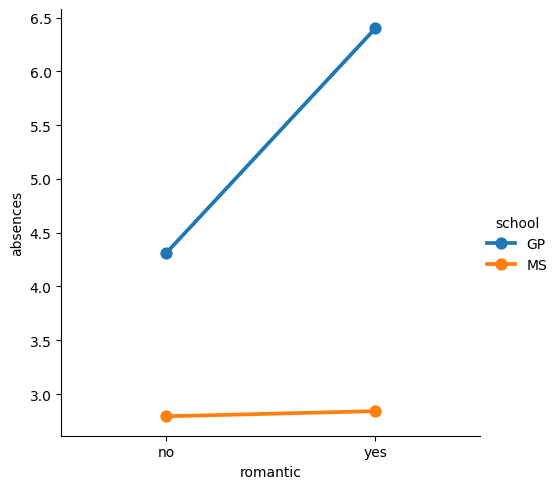

In [41]:
# Turn off the confidence intervals for this plot
sns.catplot(x="romantic", y="absences",
			data=student_data,
            kind="point",
            hue="school",
            errorbar=None)

# Show plot
plt.show()

### Changing style and palette
Let's return to our dataset containing the results of a survey given to young people about their habits and preferences. We've provided the code to create a count plot of their responses to the question "How often do you listen to your parents' advice?". Now let's change the style and palette to make this plot easier to interpret.


In [42]:
# Apply a lambda function to the 'Parents' advice' column to map numerical values to descriptive strings
survey_data["Parents' advice"] = survey_data["Parents' advice"].apply(lambda x: "Never" if x == 1 else ("Rarely" if x == 2 else ("Sometimes" if x == 3 else ("Often" if x == 4 else "Always"))))

# Rename the 'Parents' advice' column to 'Parents Advice Category'
survey_data.rename(columns={"Parents' advice": "Parents Advice"}, inplace=True)

display(survey_data.head())

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents Advice,Internet usage,Finances,Age,Siblings,Gender,Village - town,Age Category,Interested in math
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,Often,few hours a day,3.0,20.0,1.0,female,village,Under 21,False
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,Rarely,few hours a day,3.0,19.0,2.0,female,city,Under 21,True
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,Sometimes,few hours a day,2.0,20.0,2.0,female,city,Under 21,True
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,Rarely,most of the day,2.0,22.0,1.0,female,city,21 and Older,True
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,Sometimes,few hours a day,4.0,20.0,1.0,female,village,Under 21,False


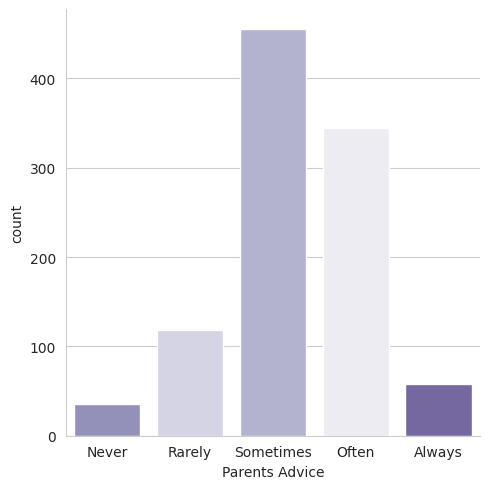

In [43]:
# # Set the style to "whitegrid"
sns.set_style("whitegrid")
sns.set_palette("Purples")

# Create a count plot of survey responses
category_order = ["Never", "Rarely", "Sometimes",
                  "Often", "Always"]

sns.catplot(x="Parents Advice",
            data=survey_data,
            kind="count",
            order=category_order,
            hue="Parents Advice")

plt.show()

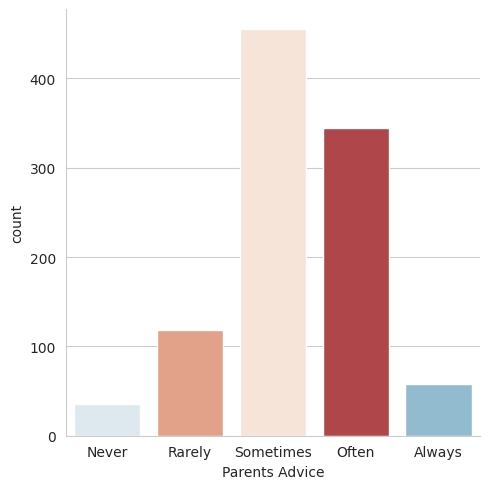

In [44]:
# # Change the color palette to "RdBu"
sns.set_style("whitegrid")
sns.set_palette("RdBu")

# Create a count plot of survey responses
category_order = ["Never", "Rarely", "Sometimes",
                  "Often", "Always"]

sns.catplot(x="Parents Advice",
            data=survey_data,
            kind="count",
            order=category_order,
            hue="Parents Advice")

# Show plot
plt.show()

In [45]:
# 1. Define the per-group probability of feeling lonely
probabilities = {
    "0": 0.28,
    "1 - 2": 0.265,
    "3+": 0.29
}

# 2. Map each row’s sibling category to its probability (fall back to the mean if unexpected)
row_probs = (
    survey_data["Siblings"]
    .astype(str)
    .map(probabilities)
    .fillna(np.mean(list(probabilities.values())))
)

# 3. Perform a Bernoulli trial for each row
random_values = np.random.rand(len(survey_data))
survey_data["Feels Lonely"] = random_values < row_probs

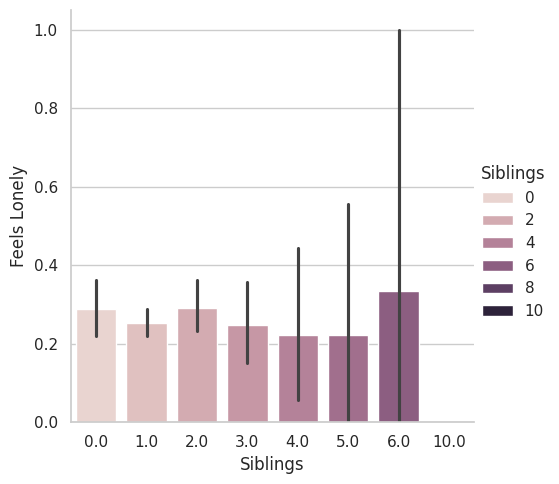

In [46]:
# Set the context to "paper"
sns.set_context("notebook")

# Create bar plot
sns.catplot(x="Siblings", y="Feels Lonely",
            data=survey_data, kind="bar", hue="Siblings")

# Show plot
plt.show()

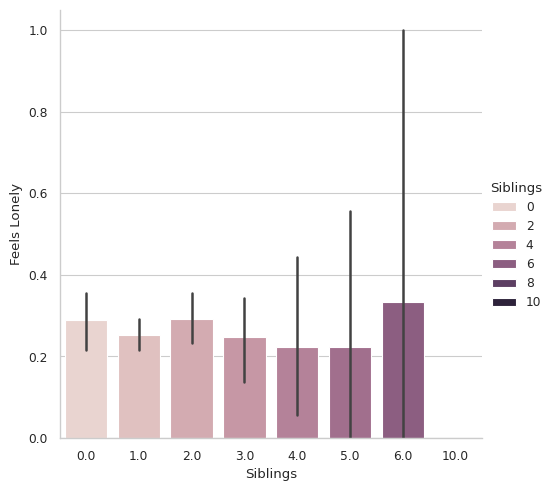

In [47]:
# Set the context to "paper"
sns.set_context("paper")

# Create bar plot
sns.catplot(x="Siblings", y="Feels Lonely",
            data=survey_data, kind="bar", hue="Siblings")

# Show plot
plt.show()

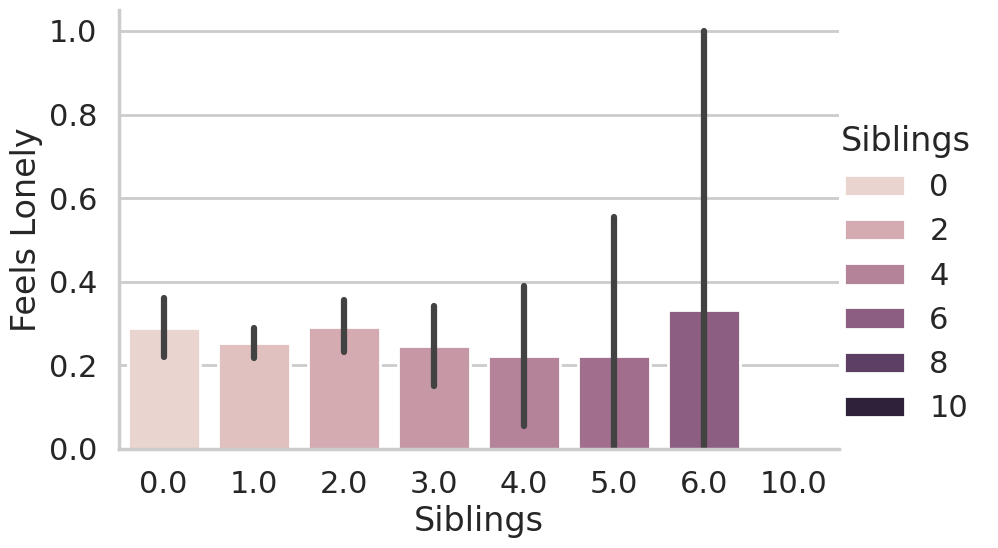

In [48]:
# Set the context to "poster"
sns.set_context("poster")

# Create bar plot
sns.catplot(x="Siblings", y="Feels Lonely",
            data=survey_data, kind="bar", hue="Siblings",
            height=6, aspect=1.5) # Added height and aspect for better layout

# Show plot
plt.show()